In [1]:
# imports
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

## Polinomio de 2º orden

Si $\mathbf{x} = (x^2,x,1)$, el polinomio que mejor ajuste a los datos $\mathbb{X}$ será el vector $\beta = (a, b, c) \in \mathbb{R}^3$ que minimice $\sum (y_i - \hat{y_i})^2$, es decir el error al *predecir* la función $y=f(x)$

Importante: el modelo planteado es $y= \mathbf{x} \cdot \beta + \epsilon$, luego $\hat{y} = \mathbf{x} \cdot \hat{\beta}$ y por tanto el modelo es *lineal* respecto de $\beta$.


In [2]:
def generate_samples(n,a,b,c, mu, sigma, noise_sigma = 0, seed=None):
  """
  Generate *n* samples for y=ax^2+bx+c, drawn from a N(mu,sigma^2) distribution.
  Optionally add noise drawn from N(0, noise_sigma^2) distribution.
  =========
  Params:
  n: int, positive. Number of samples to draw.
  a: float, non-zero. Quadratic coefficient.
  b: float. Linear coefficient.
  c: float: Independent term.
  mu: float. Mean of the normal sampling distribution.
  sigma: float, positive. Standard deviation of the normal sampling distribution.
  seed (optional): int, positive. Seed for the generation of random samples.
  noise_sigma (optional): float, positive. Standard deviation of the normal noise to add.
  """
  # sample n values from the distribution
  rng = default_rng(seed)
  x = rng.normal(loc = mu, scale = sigma, size = n)

  # calculate y using vectorized numpy operations
  y = a * x**2 + b * x + c

  # optionally add noise
  # Note: we could skip the if, but it's more understandable this way (perhaps even more efficient!)
  if noise_sigma > 0:
    noise = rng.normal(loc = 0, scale = noise_sigma, size = n)
    y += noise

  return x,y

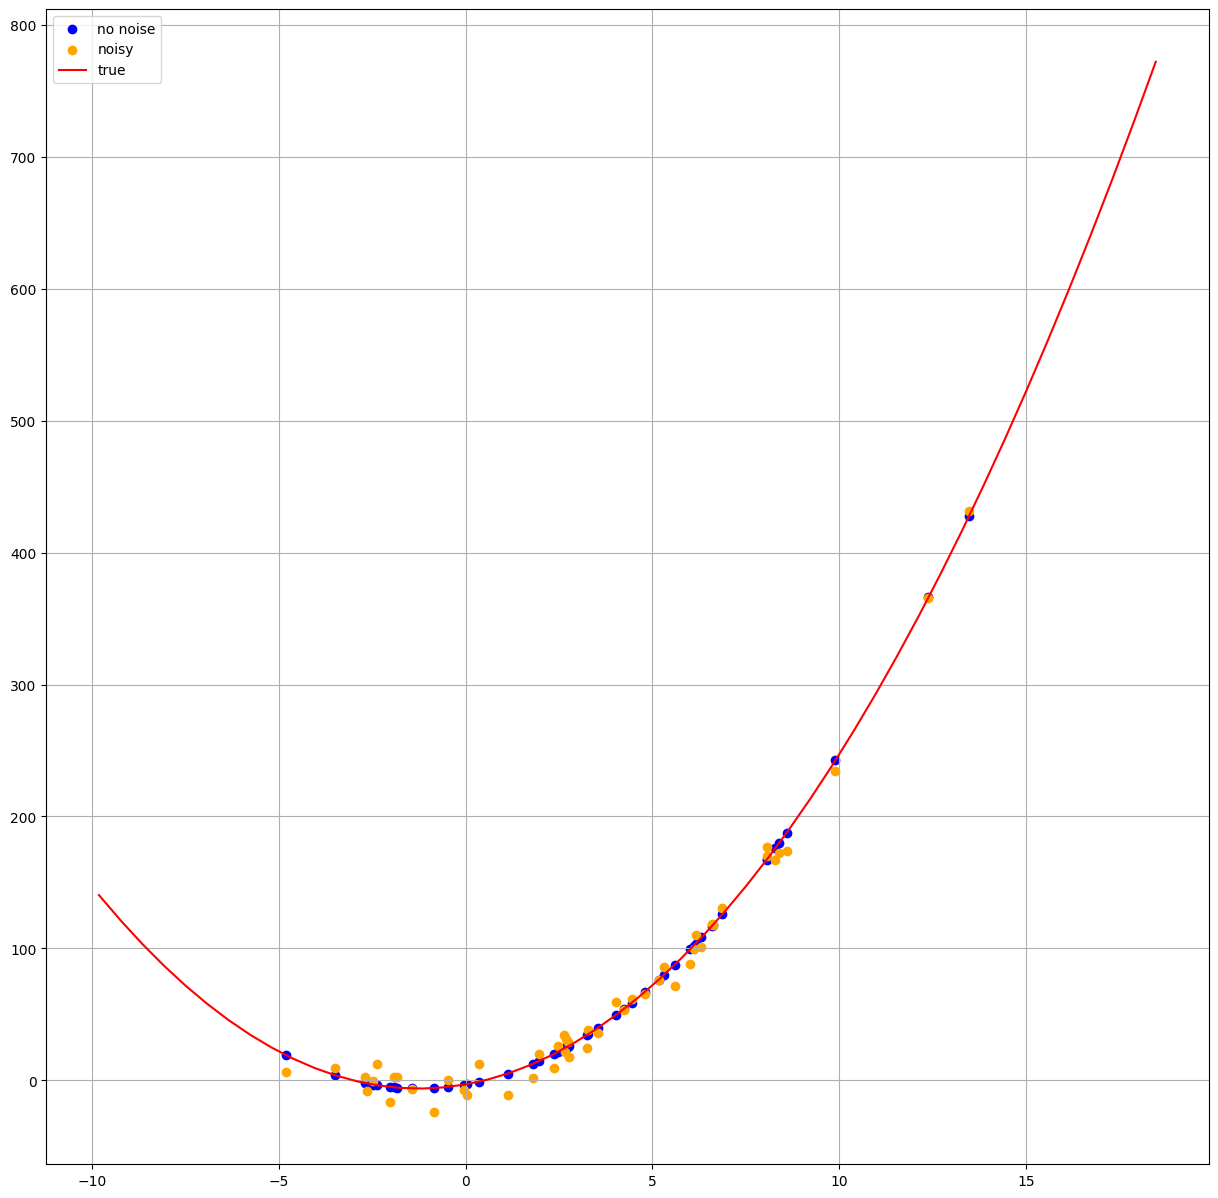

In [3]:
# parametros de sampleo
mu = 3
sigma = 4
n = 50
noise_s = 10
x_seed = 12345

# parametros del polinomio
a = 2
b = 5
c = -3
beta = np.array([a,b,c])

# primero sin ruido
x,y = generate_samples(n,a,b,c,mu,sigma, seed=x_seed, noise_sigma=0)

# ahora con ruido, mismo seed -> mismas x
x2,y2 = generate_samples(n,a,b,c,mu,sigma, seed=x_seed, noise_sigma=noise_s)

# como somos desconfiados, chequeamos que sean iguales x y x2
assert(np.all(x == x2))


# ploteamos los puntos sin ruido, con ruido y el polinomio real
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x,y, marker='o',label='no noise', color='blue')
ax.scatter(x2,y2, marker='o',label='noisy', color='orange')

extra_space = 5
xs = np.linspace(np.min(x)-extra_space, np.max(x)+extra_space)
ys = a * xs**2 + b * xs + c
ax.plot(xs,ys, color='red', label='true')

ax.legend()
ax.grid(True)

Vamos a ajustar ahora por cuadrados mínimos. Recordemos que si $n=50$ y el polinomio es de grado 2, entonces la matriz de datos tiene 50 filas y 3 columnas, es decir $\mathbb{X} \in \mathbb{R}^{50 \times 3}$.

In [12]:
# preparamos la matriz de puntos, zip genera n filas de (x^2,x,1)
X = np.array(list(zip(x**2,x,np.ones(len(x)))))
print(f"La matriz de datos tiene {X.shape[0]} filas y {X.shape[1]} columnas")

La matriz de datos tiene 50 filas y 3 columnas


Recordemos que para ajustar, como el modelo es lineal

$$
\hat{\beta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

y luego para predecir
$$
\hat{y} = \mathbf{x} \cdot \hat{\beta}
$$

In [6]:
sol_mat = np.linalg.inv(X.T @ X) @ X.T
beta_hat = sol_mat @ y

print(f"Vector original de parámetros: {beta}")
print(f"Solución de cuadrados mínimos sin ruido: {beta_hat}")

# proyecta bien cuando no hay ruido?
np.allclose(beta_hat,beta)

Vector original de parámetros: [ 2  5 -3]
Solución de cuadrados mínimos sin ruido: [ 2.  5. -3.]


True

In [7]:
# y si hay ruido?

# recordemos que la matriz de X es la misma, lo que cambia es y que ahora tiene ruido
beta_hat_noisy = sol_mat @ y2

print(f"Solución de cuadrados mínimos con ruido: {beta_hat_noisy}")

Solución de cuadrados mínimos con ruido: [ 2.00747237  4.8182042  -3.78728213]


Grafiquemos la teórica contra la ruidosa

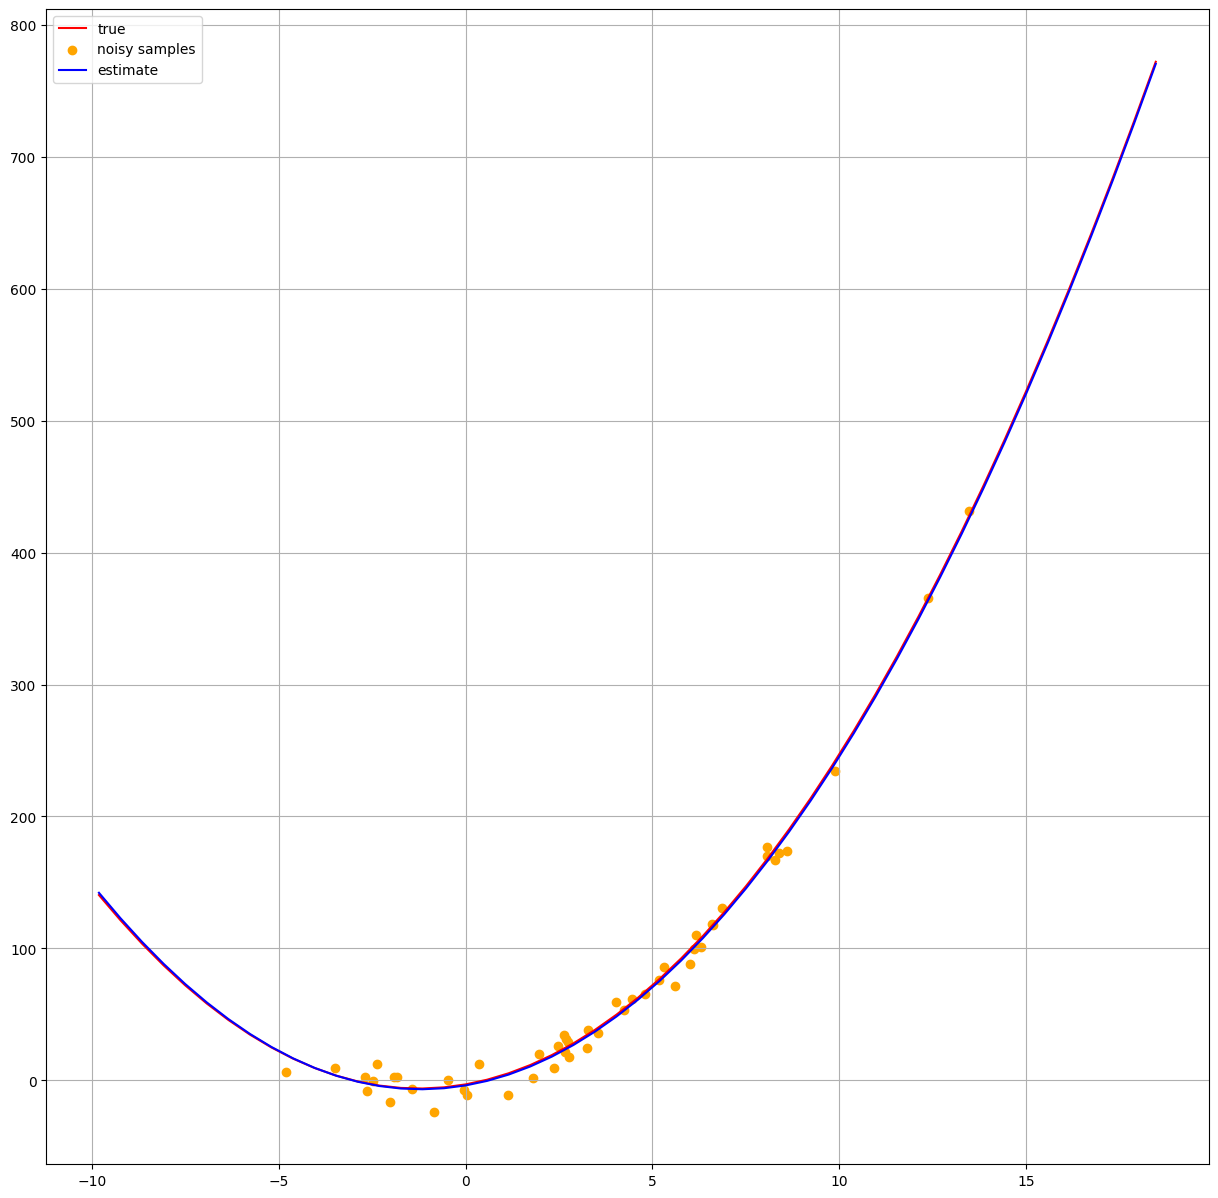

In [8]:
fig, ax = plt.subplots(figsize=(15,15))

# la original
ax.plot(xs,ys, color='red', label='true')

# los samples
ax.scatter(x2,y2, marker='o',label='noisy samples', color='orange')

# la ruidosa
X_new = np.array(list(zip(xs**2,xs,np.ones(len(xs)))))
ys_noise = X_new @ beta_hat_noisy

ax.plot(xs,ys_noise, color='blue', label='estimate')

ax.legend()
ax.grid(True)